<a href="https://colab.research.google.com/github/namwootree/Portfolio/blob/main/Competition/Kaggle/Scrabble%20Player%20Rating/DDA_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference

[Full Walkthrough (EDA + FE + Model Tuning)](https://www.kaggle.com/code/ijcrook/full-walkthrough-eda-fe-model-tuning)

# Setting

## 한글 글꼴

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (18.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


## Install

In [ ]:
!pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 5.4 MB/s 
     |████████████████████████████████| 2.0 MB 39.7 MB/s 


## Library

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic') 

from collections import Counter

from tqdm.auto import tqdm
import textstat

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

# Load Data

## Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip File

In [ ]:
!unzip -qq '/content/drive/MyDrive/머신러닝 엔지니어링/Kaggle/Scrabble Player Rating/data/scrabble-player-rating.zip'

## Load Train / Test Data Set

In [ ]:
path_train = '/content/train.csv'
path_games = '/content/games.csv'
path_turns = '/content/turns.csv'

path_test = '/content/test.csv'

In [ ]:
train = pd.read_csv(path_train)
games = pd.read_csv(path_games)
turns = pd.read_csv(path_turns)

test = pd.read_csv(path_test)

# DDA

## DataFrame

In [ ]:
print(train.shape)
train.head()

(100820, 4)


,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


In [ ]:
print(games.shape)
games.head()

(72773, 12)


,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722


In [ ]:
print(turns.shape)
turns.head()

(2005498, 9)


,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


In [ ]:
print(test.shape)
test.head()

(44726, 4)


,game_id,nickname,score,rating
0,2,Super,488,NaN
1,2,BetterBot,401,2000.0
2,7,STEEBot,377,2082.0
3,7,Priya1,379,NaN
4,11,STEEBot,334,1829.0


## NaN

In [ ]:
print(train.isnull().sum())

game_id     0
nickname    0
score       0
rating      0
dtype: int64


In [ ]:
print(games.isnull().sum())

game_id                  0
first                    0
time_control_name        0
game_end_reason          0
winner                   0
created_at               0
lexicon                  0
initial_time_seconds     0
increment_seconds        0
rating_mode              0
max_overtime_minutes     0
game_duration_seconds    0
dtype: int64


In [ ]:
print(turns.isnull().sum())

game_id             0
turn_number         0
nickname            0
rack            69390
location       132239
move              454
points              0
score               0
turn_type         395
dtype: int64


In [ ]:
print(test.isnull().sum())

game_id         0
nickname        0
score           0
rating      22363
dtype: int64


## Train

In [ ]:
train.columns

Index(['game_id', 'nickname', 'score', 'rating'], dtype='object')

In [ ]:
train['game_id'].value_counts()

1        2
48498    2
48505    2
48509    2
48512    2
        ..
24193    2
24194    2
24196    2
24197    2
72773    2
Name: game_id, Length: 50410, dtype: int64

In [ ]:
train['nickname'].value_counts()

HastyBot       17346
BetterBot      16602
STEEBot        16462
BB-8            6576
pandorable      1759
               ...  
Patchara           1
Coggles            1
Nonna2trips        1
SamuelJam          1
kacattac           1
Name: nickname, Length: 1031, dtype: int64

In [ ]:
train[['score', 'rating']].describe()

,score,rating
count,100820.000000,100820.000000
mean,399.029022,1875.592938
std,75.184778,231.791016
min,-64.000000,1033.000000
25%,352.000000,1664.000000
50%,398.000000,1907.000000
75%,445.000000,2060.000000
max,1132.000000,2510.000000


## Games

In [ ]:
games.columns

Index(['game_id', 'first', 'time_control_name', 'game_end_reason', 'winner',
       'created_at', 'lexicon', 'initial_time_seconds', 'increment_seconds',
       'rating_mode', 'max_overtime_minutes', 'game_duration_seconds'],
      dtype='object')

In [ ]:
games['game_id'].value_counts()

1        1
48515    1
48521    1
48520    1
48519    1
        ..
24264    1
24265    1
24266    1
24267    1
72773    1
Name: game_id, Length: 72773, dtype: int64

In [ ]:
games['first'].value_counts()

STEEBot         12210
BetterBot       12014
HastyBot        11632
BB-8             3288
hannahbanana     1008
                ...  
Anita_H             1
Sokhim1             1
jvp                 1
Anbu                1
kacattac            1
Name: first, Length: 1314, dtype: int64

In [ ]:
games['time_control_name'].value_counts()

regular       60282
rapid          6652
blitz          4468
ultrablitz     1371
Name: time_control_name, dtype: int64

In [ ]:
games['game_end_reason'].value_counts()

STANDARD              67987
RESIGNED               2346
TIME                   2202
CONSECUTIVE_ZEROES      238
Name: game_end_reason, dtype: int64

In [ ]:
games['winner'].value_counts()

 0    46713
 1    25792
-1      268
Name: winner, dtype: int64

In [ ]:
games['lexicon'].value_counts()

CSW21     44594
NWL20     21250
ECWL       6925
NSWL20        4
Name: lexicon, dtype: int64

In [ ]:
games['rating_mode'].value_counts()

RATED     54076
CASUAL    18697
Name: rating_mode, dtype: int64

In [ ]:
games[['initial_time_seconds', 'increment_seconds',
       'max_overtime_minutes', 'game_duration_seconds']].describe()

,initial_time_seconds,increment_seconds,max_overtime_minutes,game_duration_seconds
count,72773.000000,72773.00000,72773.000000,72773.000000
mean,1198.034230,0.22856,2.143707,484.069347
std,713.185219,2.54802,2.989853,333.563128
min,15.000000,0.00000,0.000000,7.962989
25%,900.000000,0.00000,1.000000,250.172459
50%,1200.000000,0.00000,1.000000,399.834150
75%,1200.000000,0.00000,1.000000,633.424285
max,3600.000000,60.00000,10.000000,4444.821645


## Turns

In [ ]:
turns['nickname'].value_counts()

BetterBot       360931
STEEBot         333276
HastyBot        309554
BB-8             92896
hannahbanana     26299
                 ...  
smashsmash          10
conrad              10
mpd                 10
KLG_SMKSI           10
ARIEFAHMAD           9
Name: nickname, Length: 1471, dtype: int64

In [ ]:
turns['rack'].value_counts()

I          2900
U          1883
E          1780
R          1772
N          1655
           ... 
?HJNOOR       1
?ABJLNP       1
?ABJNUX       1
?BISTUZ       1
EGHIIP        1
Name: rack, Length: 626752, dtype: int64

In [ ]:
turns['location'].value_counts()

15A    24190
H1     23894
8D     23499
O1     23377
8G     22077
       ...  
E14      178
13N      141
3N       121
M14      103
C14       86
Name: location, Length: 418, dtype: int64

In [ ]:
turns['move'].value_counts()

--          14302
QI          14221
Q.          10318
-            8065
.I           5167
            ...  
PHA.IC          1
REAlO           1
STRIVIN.        1
JU.TICE         1
SPINTOS         1
Name: move, Length: 356847, dtype: int64

In [ ]:
turns['turn_type'].value_counts()

Play             1872864
End                67987
Exchange           48997
Pass                8065
Timeout             4143
Challenge           2571
Six-Zero Rule        476
Name: turn_type, dtype: int64

In [ ]:
turns[['turn_number', 'points', 'score']].describe()

,turn_number,points,score
count,2.005498e+06,2.005498e+06,2.005498e+06
mean,1.453798e+01,2.900326e+01,2.270914e+02
std,8.434285e+00,2.210145e+01,1.343110e+02
min,1.000000e+00,-2.210000e+02,-6.400000e+01
25%,7.000000e+00,1.600000e+01,1.130000e+02
50%,1.400000e+01,2.400000e+01,2.240000e+02
75%,2.100000e+01,3.600000e+01,3.320000e+02
max,7.500000e+01,3.110000e+02,1.171000e+03


# EDA

## Target Variable

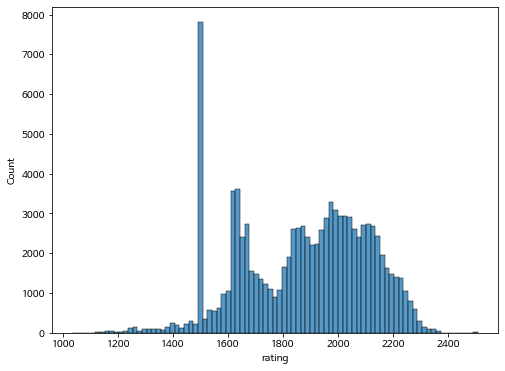

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(train['rating'], ax=plt.gca())

In [ ]:
def print_mode(df, col):

  cnt = Counter(df[col])
  list_cnt = cnt.most_common(3)

  for idx, value in enumerate(list_cnt):

    print(f'{col}의 최빈값 {idx+1}순위 : {value[0]} & {value[-1]}개')

In [ ]:
print_mode(train, 'rating')

rating의 최빈값 1순위 : 1500 & 7575개
rating의 최빈값 2순위 : 1640 & 1857개
rating의 최빈값 3순위 : 1614 & 1591개


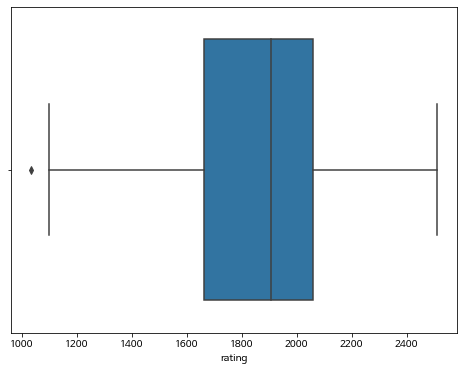

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(train['rating'], ax=plt.gca())

In [ ]:
def check_outlier(df, col):

  lowest_rate = df[col].max()
  best_rate = df[col].min()
  Q3_rate = df[col].quantile(0.75)
  Q1_rate = df[col].quantile(0.25)

  print(f'최하위 {lowest_rate}')
  print(f'최상위 {best_rate}')
  print(f'상위 75% {Q3_rate}')
  print(f'상위 25% {Q1_rate}')
  print()

  IQR = Q3_rate-Q1_rate

  high_outlier = Q1_rate - (1.5 * IQR)
  low_outlier = Q3_rate + (1.5 * IQR)

  print(f'이상치 상위 기준 : {high_outlier}')
  print(f'이상치 하위 기준 : {low_outlier}')
  print()

  cond_high = (df[col] < high_outlier)
  cond_low = (df[col] > low_outlier)
  
  print(f'상위 이상치 데이터 개수 : {df.loc[cond_high].shape[0]}')
  print(f'상위 이상치 데이터 개수 : {df.loc[cond_low].shape[0]}')

In [ ]:
check_outlier(train, 'rating')

최하위 2510
최상위 1033
상위 75% 2060.0
상위 25% 1664.0

이상치 상위 기준 : 1070.0
이상치 하위 기준 : 2654.0

상위 이상치 데이터 개수 : 1
상위 이상치 데이터 개수 : 0


## EDA of the Games

### Without Bot player

Bot의 닉네임 확인

In [ ]:
list_Bots = []

for nick in tqdm(train['nickname']):

  if 'Bot' in nick:

    if nick not in list_Bots:

      list_Bots.append(nick)

print('DONE')
print(list_Bots)

  0%|          | 0/100820 [00:00<?, ?it/s]

DONE
['BetterBot', 'STEEBot', 'HastyBot', 'MasterBot']


Text(0.5, 0.98, '플레이어당 게임 수 누적 분포')

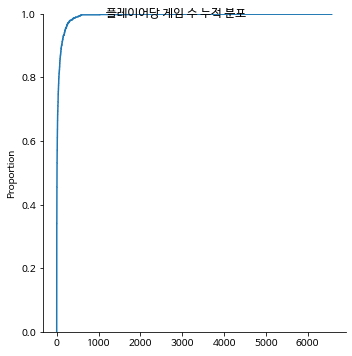

In [ ]:
# Bot이 포함되어있지 않은 닉네임과 닉네임의 개수
names, counts = np.unique(train[~train['nickname'].isin(list_Bots)]['nickname'],
                          return_counts=True)

plot = sns.displot(counts, kind='ecdf')
plot.fig.suptitle("플레이어당 게임 수 누적 분포")

In [ ]:
df_counts = pd.DataFrame({'user_name':names,
                         'counts':counts})
df_counts.sort_values('counts', ascending=False, inplace=True)
df_counts.head(10)

,user_name,counts
68,BB-8,6576
874,pandorable,1759
185,Goldenlamb,1029
212,HivinD,592
809,kar2008,576
466,Rexington,561
51,Anita,555
966,talulah,522
709,deathstar,511
282,Kovert,503


In [ ]:
print("계정당 가장 많은 게임 수 (상위 10개): {}".format(df_counts['counts'].values[:10]))
print("계정당 평균 게임 수: {}".format(np.mean(df_counts['counts'].values)))
print("계정당 게임 수 중위값: {}".format(np.median(df_counts['counts'].values)))

계정당 가장 많은 게임 수 (상위 10개): [6576 1759 1029  592  576  561  555  522  511  503]
계정당 평균 게임 수: 49.074975657254136
계정당 게임 수 중위값: 8.0


Text(0.5, 1.0, ' : 플레이어의 게임 플레이 수')

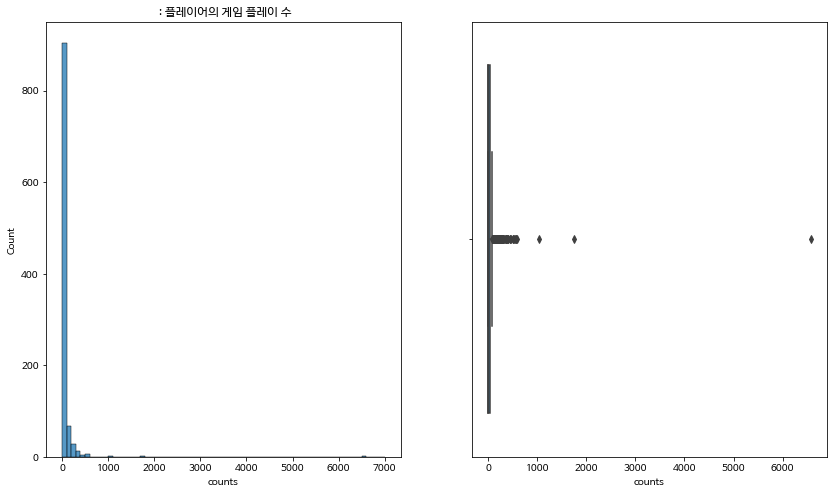

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,8))

sns.histplot(data=df_counts,
             x='counts',
             binrange=(0, 7000),
             binwidth=100,
             ax=axes[0])
axes[0].set_title("히스토그램 : 플레이어의 게임 플레이 수")

sns.boxplot(data=df_counts, x='counts', ax=axes[1])
axes[0].set_title(" : 플레이어의 게임 플레이 수")

In [ ]:
check_outlier(df_counts, 'counts')

최하위 6576
최상위 1
상위 75% 37.5
상위 25% 2.0

이상치 상위 기준 : -51.25
이상치 하위 기준 : 90.75

상위 이상치 데이터 개수 : 0
상위 이상치 데이터 개수 : 134


### With Bot Player

In [ ]:
bot_df = train[["game_id", "nickname", "score", "rating"]].copy()

# Bot만 참여한 데이터 프레임
bot_df['bot_name'] = bot_df['nickname'].apply(lambda x: x if x in list_Bots else np.nan)
bot_df = bot_df[["game_id", "score", "rating", "bot_name"]].dropna(subset=["bot_name"])
bot_df.columns = ["game_id", "bot_score", "bot_rating", "bot_name"]

In [ ]:
bot_df.head()

,game_id,bot_score,bot_rating,bot_name
0,1,335,1637,BetterBot
3,3,318,2071,BetterBot
5,4,478,1936,BetterBot
7,5,427,1844,STEEBot
9,6,427,2143,STEEBot


In [ ]:
bot_df['bot_name'].value_counts()

HastyBot     17346
BetterBot    16602
STEEBot      16462
MasterBot       10
Name: bot_name, dtype: int64

### Merge Human & Bot

full_df에 bot_name 'MasterBot'은 제거된다. 왜냐하면 'MasterBot'은 Bot 상대로 밖에 상대하지 않았기 때문이다

In [ ]:
full_df = train[~train['nickname'].isin(list_Bots)] # Bot이 없는 데이터 프레임
full_df = full_df.merge(bot_df, on="game_id") # Bot Data Frame Merge 
full_df = full_df.merge(games, on="game_id") # Games Data Frame Merge 
full_df["created_at"] = pd.to_datetime(full_df["created_at"])

In [ ]:
full_df.head()

,game_id,nickname,score,rating,bot_score,bot_rating,bot_name,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,stevy,429,1500,335,1637,BetterBot,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,3,davidavid,440,1811,318,2071,BetterBot,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
2,4,Inandoutworker,119,1473,478,1936,BetterBot,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
3,5,stevy,325,1500,427,1844,STEEBot,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722
4,6,HivinD,378,2029,427,2143,STEEBot,HivinD,regular,STANDARD,0,2022-08-21 14:56:35,CSW21,900,0,RATED,1,426.950541


### Check Sample 

In [ ]:
# 플레이어 중 무작위로 하나 추출
sample_nick = full_df["nickname"].sample(1).values[0]

print(sample_nick)

atay8


In [ ]:
# 무작위로 추출된 플레이어의 순위와 Bot 상대 정보 (시간 순)
full_df[full_df["nickname"]==sample_nick].sort_values(by="created_at")[["created_at", "rating", "bot_name"]]

,created_at,rating,bot_name
30913,2022-07-27 09:00:48,2163,STEEBot
26266,2022-07-27 09:08:25,2149,STEEBot
10427,2022-07-27 09:26:44,2136,STEEBot
49906,2022-07-27 09:36:19,2123,STEEBot
5157,2022-07-27 09:48:45,2130,STEEBot
...,...,...,...
30643,2022-09-20 09:14:39,2205,STEEBot
16565,2022-09-21 05:15:46,2217,STEEBot
17278,2022-09-21 05:23:33,2205,STEEBot
39185,2022-09-22 03:16:05,2193,STEEBot


Text(0.5, 1.0, '플레이어 atay8 의 시간대 및 상대 Bot별 점수')

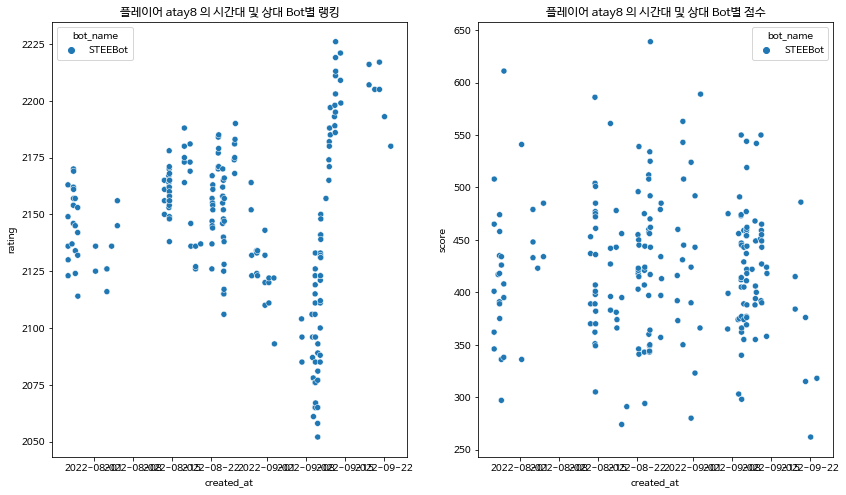

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,8))

# 무작위로 추출된 플레이어의 시간대 및 상대 Bot별 랭킹
sns.scatterplot(data = full_df[full_df["nickname"]==sample_nick].sort_values(by="created_at")[["created_at", "rating", "bot_name"]],
                x="created_at",
                y="rating",
                hue="bot_name",
                ax=axes[0])
axes[0].set_title("플레이어 {} 의 시간대 및 상대 Bot별 랭킹".format(sample_nick))

# 무작위로 추출된 플레이어의 시간대 및 상대 Bot별 점수
sns.scatterplot(data = full_df[full_df["nickname"]==sample_nick].sort_values(by="created_at")[["created_at", "score", "bot_name"]],
                x="created_at",
                y="score",
                hue="bot_name",
                ax=axes[1])
axes[1].set_title("플레이어 {} 의 시간대 및 상대 Bot별 점수".format(sample_nick))

### 1500등 유저 분석

Train 데이터의 'rating'에서 1500등이 유난히 많은 것을 확인함

In [ ]:
# 순위가 1500등인 닉네임과 닉네임의 개수
users, counts = np.unique(full_df[full_df['rating'] == 1500]['nickname'],
                          return_counts=True)

print("랭킹이 1500등인 유저 수: {}".format(len(users)))

랭킹이 1500등인 유저 수: 108


In [ ]:
# 순위가 1500등인 닉네임 (랭킹 1500등 많이 한 순)
print("순위가 1500등인 닉네임 (랭킹 1500등 많이 한 순) : ")
print(users[np.argsort(counts)[::-1][:34]])

순위가 1500등인 닉네임 (랭킹 1500등 많이 한 순) : 
['BB-8' 'stevy' 'CobaltBlue' 'TT9000' 'MankDemes' 'evatt' 'matterhorn'
 'naushika' 'Best459' 'CodeTitan' 'SGP' 'HaDZ' 'TheOneWhoKnocks' 'Alexaa'
 'thyme' 'Piro' 'marcmyword' 'replacehim' 'Scal' 'J-Oriola' 'Kidikibudi'
 'puddingy1' 'Pranjal1307' 'BethMix' 'Mollygardner' 'Nickphone'
 'SmartGoose' 'thompson8295' 'suffixt' 'Toronto2' 'tripack' 'Arnav1'
 'Bingobabe' 'Casty']


In [ ]:
# 랭킹 1500등 한 횟수
print("랭킹 1500등 한 횟수 : ")
print(counts[np.argsort(counts)[::-1][:34]])

랭킹 1500등 한 횟수 : 
[6576  410   99   89   81   51   35   27   17   16   14   13    9    7
    7    6    3    3    3    3    3    3    3    3    2    2    2    2
    2    2    2    2    2    2]


In [ ]:
# 유저의 게임 플레이 정보 ("created_at", "rating", "bot_name")
def display_df(nick_name):
  
  print(f'nick name : {nick_name}')
  display(full_df[full_df["nickname"]==nick_name].sort_values(by="created_at")[["created_at", "rating", "bot_name"]])

In [ ]:
# 유저의 Bot 상대별 시간대 순 랭킹 및 Bot 상대별 시간대 순 점수
def display_rating_score(nick_name):
  fig, axes = plt.subplots(1, 2, figsize=(16,8))

  sns.scatterplot(data = full_df[full_df["nickname"]==nick_name].sort_values(by="created_at")[["created_at", "rating", "bot_name"]], x="created_at", y="rating", hue="bot_name", ax=axes[0])
  axes[0].set_title("유저 {}의 Bot 상대별 시간대 순 랭킹".format(nick_name))

  sns.scatterplot(data = full_df[full_df["nickname"]==nick_name].sort_values(by="created_at")[["created_at", "score", "bot_name"]], x="created_at", y="score", hue="bot_name", ax=axes[1])
  axes[1].set_title("유저 {}의 Bot 상대별 시간대 순 점수".format(nick_name))

  plt.show()

#### BB-8

In [ ]:
display_df(nick_name = 'BB-8')

nick name : BB-8


,created_at,rating,bot_name
30504,2022-08-26 06:00:26,1500,HastyBot
12110,2022-08-26 06:05:42,1500,HastyBot
47164,2022-08-26 06:10:01,1500,HastyBot
31576,2022-08-26 06:14:56,1500,HastyBot
13207,2022-08-26 06:20:02,1500,HastyBot
...,...,...,...
394,2022-09-23 15:15:49,1500,HastyBot
17166,2022-09-23 15:20:13,1500,HastyBot
5923,2022-09-23 15:24:34,1500,HastyBot
27343,2022-09-23 15:30:16,1500,HastyBot


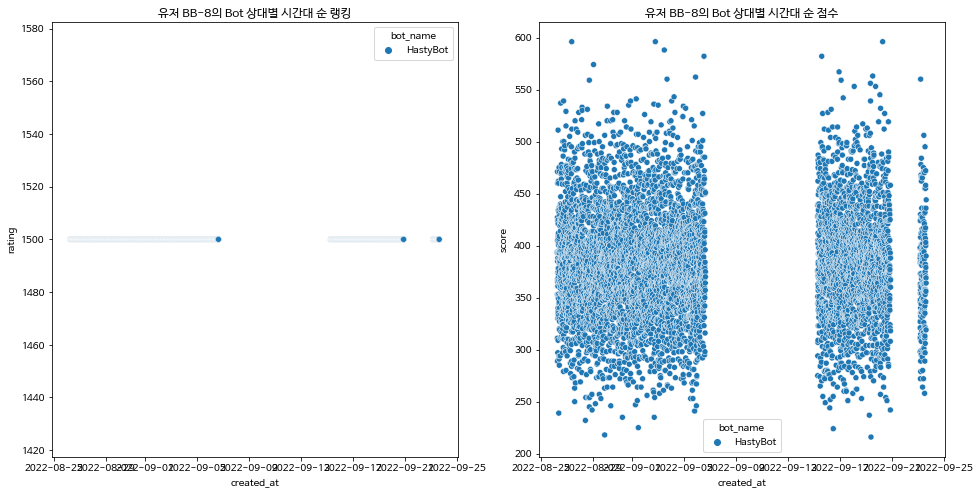

In [ ]:
display_rating_score(nick_name = 'BB-8')

#### stevy

In [ ]:
display_df(nick_name = 'stevy')

nick name : stevy


,created_at,rating,bot_name
29368,2022-08-05 22:55:31,1500,BetterBot
580,2022-08-05 23:09:59,1500,BetterBot
6557,2022-08-05 23:23:45,1500,BetterBot
19060,2022-08-05 23:38:19,1500,BetterBot
28429,2022-08-05 23:55:52,1500,BetterBot
...,...,...,...
21841,2022-09-23 00:34:52,1500,STEEBot
2804,2022-09-23 00:46:18,1500,STEEBot
4956,2022-09-23 01:04:52,1500,STEEBot
19020,2022-09-23 01:20:57,1500,STEEBot


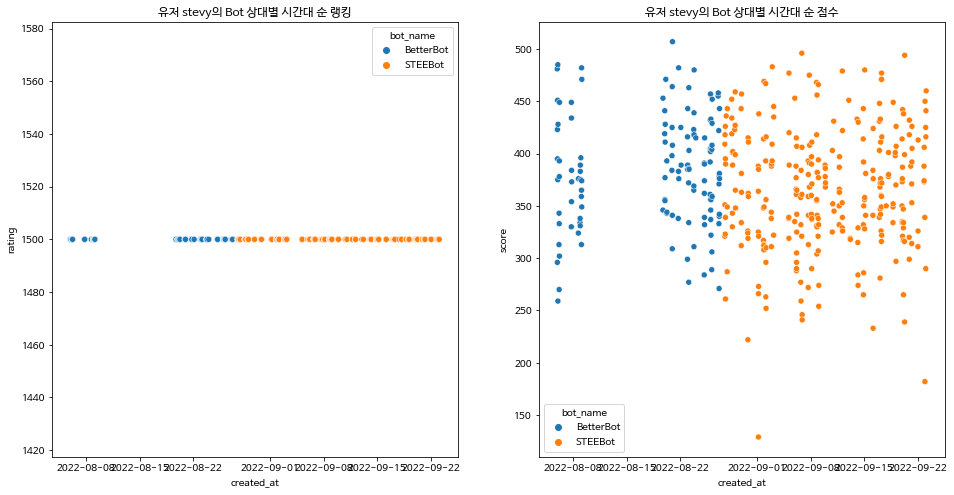

In [ ]:
display_rating_score(nick_name = 'stevy')

#### BethMix

In [ ]:
display_df(nick_name = 'BethMix')

nick name : BethMix


,created_at,rating,bot_name
26869,2022-08-07 01:32:07,1491,BetterBot
23197,2022-08-09 03:32:40,1608,STEEBot
613,2022-08-09 18:50:03,1604,STEEBot
49970,2022-08-09 18:59:12,1618,STEEBot
16876,2022-08-10 20:33:42,1608,STEEBot
...,...,...,...
27687,2022-09-22 20:30:18,1569,HastyBot
12883,2022-09-22 23:46:57,1567,HastyBot
15020,2022-09-22 23:51:53,1565,HastyBot
15628,2022-09-23 00:46:05,1563,HastyBot


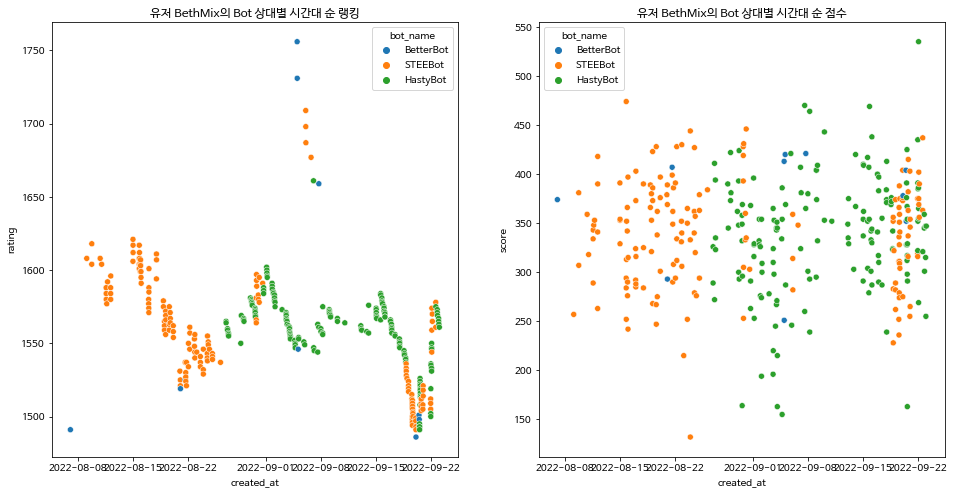

In [ ]:
display_rating_score(nick_name = 'BethMix')

### 랭킹이 1500등이고 두 번 이상의 게임을 플레이한 계정 수

In [ ]:
# 랭킹 1500등인 유저의 닉네임과 순위
# 닉네임별 닉네임 개수 (플레이 수) 및 1500등한 횟수
df = full_df[full_df['nickname'].isin(users)][['nickname', 'rating']]\
                                .groupby('nickname')\
                                .agg({"nickname":"count",
                                      "rating" : lambda x: np.sum(x == 1500)
                                      })

# 비율 = 1500등 한 횟수 / 플레이 수
df["ratio"] = df["rating"]/df["nickname"]
print("랭킹이 1500등이고 두 번 이상의 게임을 플레이한 계정 수 : {}"\
      .format(len(df[(df["ratio"] >=1.0) & (df["nickname"]>1)])))

랭킹이 1500등이고 두 번 이상의 게임을 플레이한 계정 수 : 20


In [ ]:
df[(df["ratio"] >=1.0) & (df["nickname"]>1)]

,nickname,rating,ratio
nickname,,,
Alexaa,7,7,1.0
BB-8,6576,6576,1.0
CobaltBlue,99,99,1.0
CodeTitan,16,16,1.0
HaDZ,13,13,1.0
Kidikibudi,3,3,1.0
MankDemes,81,81,1.0
Nickphone,2,2,1.0
SGP,14,14,1.0


### 변수 간의 가능한 양의 상관 관계

Bot 상대별 점수와 랭킹 상관관계

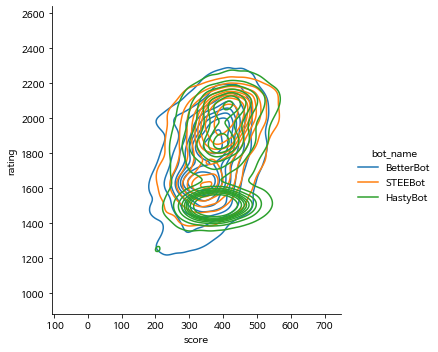

In [ ]:
sns.displot(full_df[["rating", "score", "bot_name"]],
            x="score", y="rating",
            hue="bot_name",
            kind="kde")

승부 결과 별 점수와 랭킹 상관관계

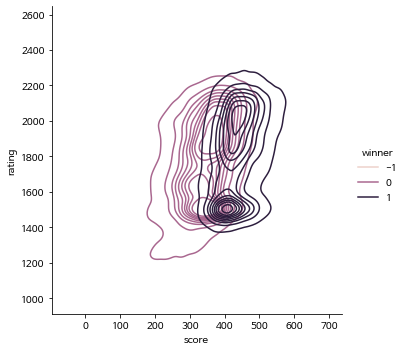

In [ ]:
sns.displot(full_df[["rating", "score", "winner"]],
            x="score", y="rating",
            hue="winner",
            kind="kde")

### 유저별 게임 플레이 성적

In [ ]:
# 유저별 게임 플레이 성적
player_avg_performance = full_df[["nickname","score",
                                  "rating", "winner",
                                  "game_duration_seconds"]]\
                                  .groupby("nickname")\
                                  .agg({"score":"mean", 
                                        "rating":"mean", 
                                        "winner":"sum", 
                                        "nickname":"count",
                                        "game_duration_seconds":"mean"        
                                        })
                                  
player_avg_performance["win_ratio"] = player_avg_performance["winner"] / player_avg_performance["nickname"]

In [ ]:
player_avg_performance.head()

,score,rating,winner,nickname,game_duration_seconds,win_ratio
nickname,,,,,,
0188889876,15.000000,1979.000000,0,1,61.405180,0.000000
0927399533,237.578947,1484.473684,1,19,1122.674674,0.052632
1,356.500000,1632.000000,0,2,352.108487,0.000000
171_selene,328.400000,1931.000000,1,5,871.676149,0.200000
220674_ZAVEPHUA,304.300000,1551.033333,4,30,429.657429,0.133333


점수와 등수 상관관계

Text(0.5, 0.98, '점수와 등수 상관관계')

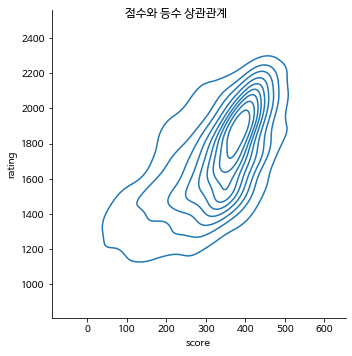

In [ ]:
plot = sns.displot(player_avg_performance, x="score", y="rating", kind="kde")
plot.fig.suptitle("점수와 등수 상관관계")

승리률과 랭킹 상관관계

Text(0.5, 0.98, '승리률과 랭킹 상관관계')

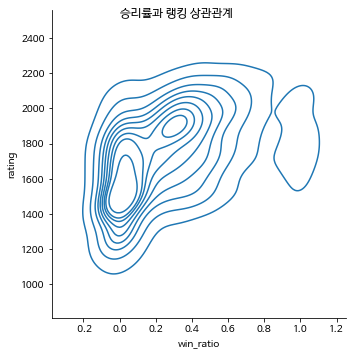

In [ ]:
plot = sns.displot(player_avg_performance, x="win_ratio", y="rating", kind="kde")
plot.fig.suptitle("승리률과 랭킹 상관관계")

경기 시간과 랭킹의 상관관계

Text(0.5, 0.98, '경기 시간과 랭킹의 상관관계')

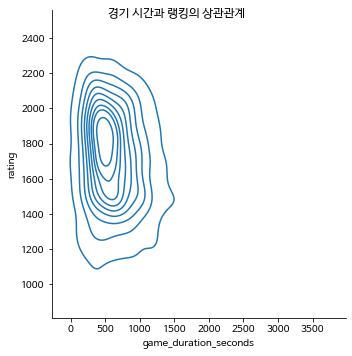

In [ ]:
plot = sns.displot(player_avg_performance, x="game_duration_seconds", y="rating", kind="kde")
plot.fig.suptitle("경기 시간과 랭킹의 상관관계")

### Calculation of correlations of player stats with their ratings

In [ ]:
print("유저별의 평균 점수와 랭킹의 상관관계 {:.3f}".format(player_avg_performance["score"].corr(player_avg_performance["rating"])))
print("유저별의 평균 우승와 랭킹의 상관관계 {:.3f}".format(player_avg_performance["score"].corr(player_avg_performance["winner"])))
print("유저별의 평균 우승 비율와 랭킹의 상관관계 {:.3f}".format(player_avg_performance["score"].corr(player_avg_performance["win_ratio"])))
print("유저별의 평균 경기 시간와 랭킹의 상관관계 {:.3f}".format(player_avg_performance["score"].corr(player_avg_performance["game_duration_seconds"])))

유저별의 평균 점수와 랭킹의 상관관계 0.611
유저별의 평균 우승와 랭킹의 상관관계 0.102
유저별의 평균 우승 비율와 랭킹의 상관관계 0.641
유저별의 평균 경기 시간와 랭킹의 상관관계 0.021


## EDA of the Turns

In [ ]:
turns.head()

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


In [ ]:
def fe_turns(df):

    df["rack_len"] = df["rack"].str.len() # rack (남은 타일)의 개수
    df["rack_len_less_than_7"] = df["rack_len"].apply(lambda x : x <7) # rack의 개수가 6 이하
    df["move_len"] = df["move"].str.len() # 배치한 타일 개수
    df["move"].fillna("None",inplace=True) # 결측치 처리
    # Dale–Chall readability formula 기준 어려운 단어
    df["difficult_word"] = df["move"].apply(textstat.difficult_words)
    
    df["turn_type"].fillna("None",inplace=True) # 결측치 처리
    turn_type_unique = df["turn_type"].unique()
    df = pd.get_dummies(df, columns=["turn_type"]) # 'turn_type' 변수 더미화
    dummy_features = [f"turn_type_{value}" for value in turn_type_unique]
    
    # 타일 위치 정보 전처리

    # X축 정보
    char_map = {
        'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8,
        'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15,
    }
    df['y'] = df["location"].str.extract('(\d+)')[0].values # 숫자만 추출
    df['y'].fillna("0",inplace=True) # 결측치 처리
    df["y"] = df["y"].astype(int) # 데이터 타입 변경
    
    df["x"] = df["location"].str.extract('([A-Z])')[0].values # 글자만 추출
    df["x"].replace(char_map, inplace=True) # 숫자로 변경
    df['x'].fillna("0",inplace=True) # 결측치 처리
    df["x"] = df["x"].astype(int) # 데이터 타입 변경
    
    # 데이터의 첫 글자가 숫자인지 아닌지 여부
    df["direction_of_play"] = df["location"].apply(lambda x: 1 if str(x)[0].isdigit() else 0)
    
    # 타일의 위치 정보를 나타내지 않은 것의 개수 (. , (time) 등등)
    df["curr_board_pieces_used"] = df["move"].apply(lambda x: str(x).count(".") + sum(int(c.islower()) for c in str(x)))
    
    return df, dummy_features

In [ ]:
turns_fe, dummy_features = fe_turns(turns.copy())

In [ ]:
# 평균값을 구할 변수
avg_features = ["points", "move_len", "difficult_word",
                "curr_board_pieces_used", "direction_of_play"]

# 합계를 구할 변수
sum_features = ["difficult_word", "rack_len_less_than_7"]+dummy_features

# 최대값을 구할 변수
max_features = ["move_len", "points"]

agg_func = {feature:'sum' for feature in dummy_features}

agg_func.update({
    "points":["mean", "max"],
    "move_len":["mean", "max"],
    "difficult_word":["mean", "sum"],
    "curr_board_pieces_used": "mean",
    "direction_of_play": "mean",
    "rack_len_less_than_7" : "sum"})

turns_grouped = turns_fe.groupby(["game_id", "nickname"], as_index=False).agg(agg_func)

# 변수명 변경
turns_grouped.columns = ["_".join(a) if a[0] not in ["game_id", "nickname"] else a[0] for a in turns_grouped.columns.to_flat_index()]

In [ ]:
full_df = full_df.merge(turns_grouped, how="left", on=["game_id", "nickname"])

In [ ]:
full_df.head()

,game_id,nickname,score,rating,bot_score,bot_rating,bot_name,first,time_control_name,game_end_reason,...,turn_type_None_sum,points_mean,points_max,move_len_mean,move_len_max,difficult_word_mean,difficult_word_sum,curr_board_pieces_used_mean,direction_of_play_mean,rack_len_less_than_7_sum
0,1,stevy,429,1500,335,1637,BetterBot,BetterBot,regular,STANDARD,...,0,30.642857,98,3.857143,7.0,0.071429,1,0.428571,0.714286,2
1,3,davidavid,440,1811,318,2071,BetterBot,BetterBot,regular,STANDARD,...,0,31.428571,103,4.357143,7.0,0.142857,2,0.428571,0.142857,1
2,4,Inandoutworker,119,1473,478,1936,BetterBot,BetterBot,regular,RESIGNED,...,0,8.500000,26,2.928571,7.0,0.071429,1,0.928571,0.642857,0
3,5,stevy,325,1500,427,1844,STEEBot,STEEBot,regular,STANDARD,...,0,20.312500,51,3.375000,6.0,0.062500,1,0.312500,0.500000,2
4,6,HivinD,378,2029,427,2143,STEEBot,HivinD,regular,STANDARD,...,0,31.500000,74,4.750000,6.0,0.166667,2,0.666667,0.500000,0


In [ ]:
full_df.columns

Index(['game_id', 'nickname', 'score', 'rating', 'bot_score', 'bot_rating',
       'bot_name', 'first', 'time_control_name', 'game_end_reason', 'winner',
       'created_at', 'lexicon', 'initial_time_seconds', 'increment_seconds',
       'rating_mode', 'max_overtime_minutes', 'game_duration_seconds',
       'turn_type_Play_sum', 'turn_type_End_sum', 'turn_type_Exchange_sum',
       'turn_type_Pass_sum', 'turn_type_Timeout_sum',
       'turn_type_Challenge_sum', 'turn_type_Six-Zero Rule_sum',
       'turn_type_None_sum', 'points_mean', 'points_max', 'move_len_mean',
       'move_len_max', 'difficult_word_mean', 'difficult_word_sum',
       'curr_board_pieces_used_mean', 'direction_of_play_mean',
       'rack_len_less_than_7_sum'],
      dtype='object')

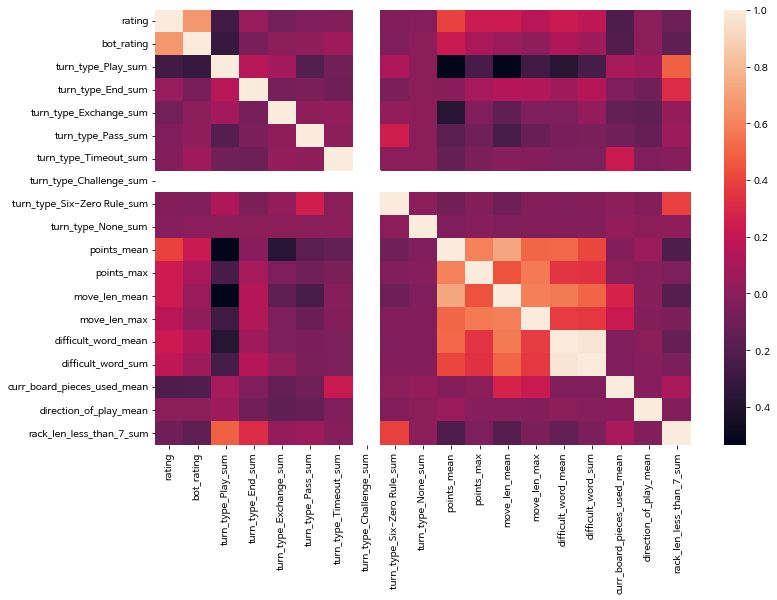

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(full_df[['rating', 'bot_rating'] +list(turns_grouped.columns[2:])].corr())